# Sentiment Analysis of Alexandre Dumas' *The Count of Monte Cristo*
For this project, I used *The Count of Monte Cristo* because I find this story fascinating and I had the chance to have studied the text in previous semesters. So, I wanted to use Python to analyse, specifically, the connection between the love and redemption that Dantés goes through to the characters of Haydée and Mercédès. This theme is a major part in Dumas criticism, and I think it has a very great influence on Dantés' story throughout the novel.

In order to address this topic, Python will help to find every instance that Haydée and Mercédès are mentioned, analyze the the sentiment of the text and then provide a comparison between the two characters' effect on the novel.

First step is to open all the documents into memory so that when we mention them, Python will know what we're reffering to. In this case, every text file has been open into a variable with the same name for better organization. 

Although we could combine all the text into one single variable, the NLP program we will be using later cannot handle such an enourmous amount of text. Therefore, we have decided to keep each volume separate.

In [3]:
with open ('comte-1.txt') as f:
    comte_text1 = f.read()

In [4]:
with open ('comte-2.txt') as f:
    comte_text2 = f.read()

In [5]:
with open ('comte-3.txt') as f:
    comte_text3 = f.read()

In [6]:
with open ('comte-4.txt') as f:
    comte_text4 = f.read()

Next step is to import all libraries that will be needed for this process. 

SpaCy
: a NLP (natural language processing) library that will be able to read, categorize and tokenize every word in this text with the help of the French language pipeline called 'fr_core_news_sm'. (https://realpython.com/natural-language-processing-spacy-python/)

Matplotlib 
: a library that will help create visualizations, like graphs, in Python. (https://matplotlib.org/)

Re or Regular Expressions Module
: a built-in Python library that is made to recognize, search, match, split, replace, or work with patterns in this text. (https://docs.python.org/3/library/re.html)

NumPy (Numerical Python)
: a Python library that works with data structures and mathematical operations. (https://numpy.org/doc/stable/user/absolute_beginners.html)

textblob
: a built-in Python library that helps with processing textual data. In this case, it will help to determine whether words are positive, negative or neutral.

textblob_fr is made specifically for the French language.

Blobber
: a way to reuse textblob objects to make a more efficient use of memory.

In [8]:
import spacy
nlp = spacy.load('fr_core_news_sm')

import matplotlib.pyplot as plt

import re

import numpy as np

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from nltk.tokenize import sent_tokenize

With all libraries imported into this environment, the first step is defining a function that will look into every volume and separate each volume's chapters by using the Roman numerals as a signal to make the split.

In [10]:
def split_into_chapters(text):
    pattern = r"\n{2,}([IVXLCDM]+)\n+\s*(.*?)\n"
    
    matches = re.split(pattern, text)
 
    # Once the variables are defined, then we make a dictionary that will store the chapters.
    chapters = {}
    for i in range(1, len(matches), 3):
        chapter_num = matches[i]
        chapter_title = matches[i + 1]
        chapter_content = matches[i + 2].strip()
        chapters[f"{chapter_num}"] = chapter_content
 
    return chapters

Now we are using this function to go through every volume and splitting them into chapters, this will allow us to break the text into more manageable chunks that we can analyze.

chapters_1 belongs to the chapters in volume 1 and every volume to their chapters accordingly.

In [12]:
chapters_1 = split_into_chapters(comte_text1)
chapters_2 = split_into_chapters(comte_text2)
chapters_3 = split_into_chapters(comte_text3)
chapters_4 = split_into_chapters(comte_text4)

Now, we will store all the chapters from every volume into the all_chaps variable that will be able to reduce the amount of variables we are working with. So instead of looking at four individual variables, we are only using one now.

In [14]:
all_chapts = {k: v for d in [chapters_1, chapters_2, chapters_3, chapters_4] for k, v in d.items()}

Now, we are defining a function that will tokenize the text through the use of spaCy (with the nlp variable) and then it will calculate every time a specified entity is named then those numbers will be stored in a dictionary that we created with the variable freqs.

Entities come from the NER (Named Entity Recognition) part of the spaCy pipeline:

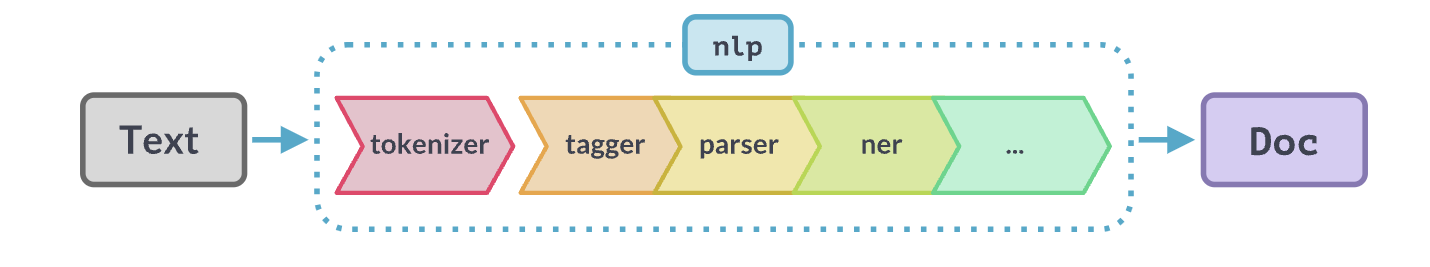

From this process, the text is being analyzed and when there are objects with proper names, spaCy will assign labels to those named entities through NER.

For example, in this case we are working with characters like Dantès, therefore the tag should be PER - person, character.

But there are other categories within NER like Location, Percent or Organization.

In [16]:
def calculate_freqs(chapters, target_ent):
    freqs = {}
    for number, chapter in chapters.items():
        doc = nlp(chapter)
        freqs[number] = 0
        for ent in doc.ents:
            if ent.text == target_ent:
                freqs[number] += 1
    return freqs

Since entities can sometimes be tagged incorrecty based on the formatting of the text, we are adding the EntityRuler to our pipeline in order to give our preferences to the NER part of the pipeline to ensure that spaCy is marking Dantés, Haydée and Mercédès as character names since they're the focus of our analysis.

In [18]:
from spacy.pipeline import EntityRuler

ruler = nlp.add_pipe("entity_ruler", before = "ner")

patterns = [{"label": "PER", "pattern" : "Dantès"}, {"label": "PER", "pattern" : "Haydée"}, {"label": "PER", "pattern" : "Mercédès"}]

ruler.add_patterns(patterns)

Now, we are telling Python to use the calculate_freqs function that we defined earlier while looking for the 'Mercédès' named entity through all the chapters and store those numbers in the all_Mfreqs variable. This will give us the amount of times that Mercédès has been mentioned throughout the entirety of the text.

In [20]:
all_Mfreqs = calculate_freqs(all_chapts, 'Mercédès')

After, we repeat the process while looking for the 'Haydée' named entity and storing those numbers in the all_Hfreqs variable.

In [22]:
all_Hfreqs = calculate_freqs(all_chapts, 'Haydée')

Now, we are defining the tb (textblob) variable as a part of speech (pos) tagger and a pattern analyzer. Both of these will tag the contents of the text (p.o.s. tagger) and will analyze the sentiment of the text (pattern analyzer).

For the sentiment, it will be in a scale of 1 for positive sentiment, 0 for neutral sentiment and -1 for negative sentiment.

In [24]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

With the textblob, we will look at each chapter within each volume (since they're stored in the all_chapts variable) and then it will store all the sentiment scores that we get into the all_sentiments variable.

In [26]:
all_sentiments = [tb(chapter).sentiment[0] for chapter in list(all_chapts.values())]

Since now we have all scores, then we will plot them into a graph.

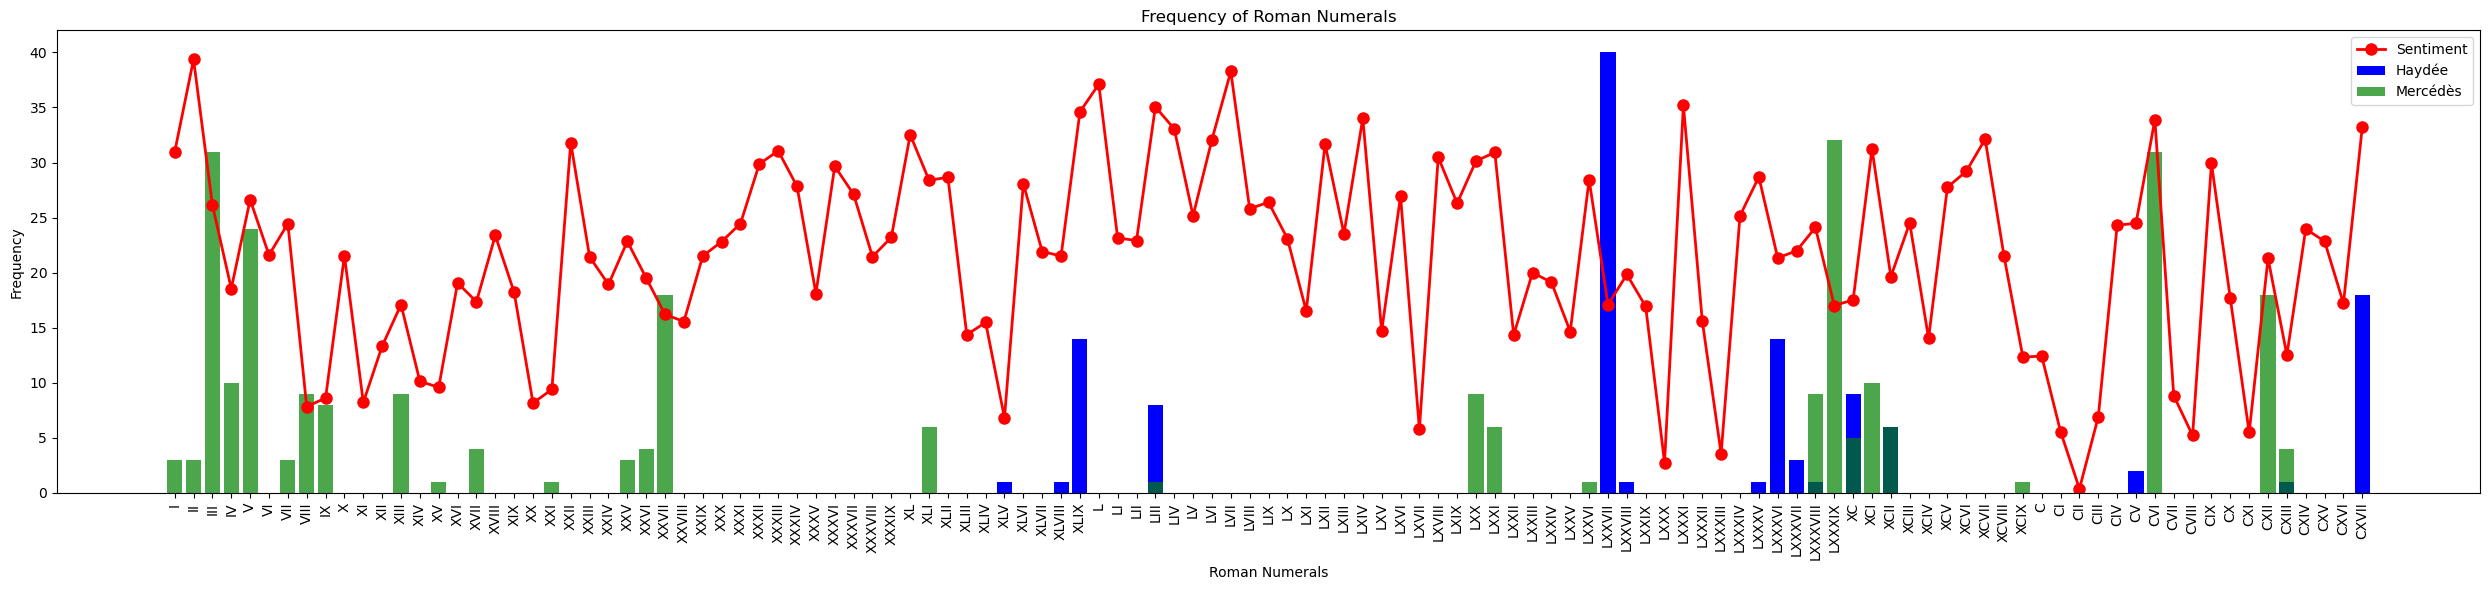

In [28]:
H_keys = list(all_Hfreqs.keys())
H_values = list(all_Hfreqs.values())

M_keys = list(all_Mfreqs.keys())
M_values = list(all_Mfreqs.values())

# We will be using matplotlib, which we imported at the beginning, to make a graphchart.
plt.figure(figsize=(25, 6))  # These numbers let us manipulate the size of the graph for all chapters to fit.
plt.bar(H_keys, H_values, color='blue', label='Haydée') # These variables allow us to choose different colors for Haydée and Mercédes.
plt.bar(M_keys, M_values, color='green', label='Mercédès', alpha=0.7)

# These are the list of x and y labels for the graph.
plt.xlabel('Roman Numerals')
plt.ylabel('Frequency')
plt.title('Frequency of Roman Numerals')

# This is the variable that allow us to rotate the labels for the chapter numbers.
plt.xticks(rotation=90)

# These variables allow us to make the sentiment scores fit into the chart since the numbers are not using the same scale.
# Remember that sentiment scores use a -1 (negative) to 0 (neutral) to 1 (positive).
min_sentiment = -0.02
max_sentiment = 0.17
min_bar = 0
max_bar = 40

# Function to normalize sentiment scores so that they're consistent with the range of mentions.
def normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar):
    return (score - min_sentiment) / (max_sentiment - min_sentiment) * (max_bar - min_bar) + min_bar

normalized_sentiment = [normalize_sentiment(score, min_sentiment, max_sentiment, min_bar, max_bar) for score in all_sentiments]

plt.plot(range(len(normalized_sentiment)), normalized_sentiment, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label='Sentiment')

plt.legend()
plt.tight_layout() 
plt.show()

For the final view of this analysis, we will combine the graphs of both sentiment and mentions of the characters to be able to have a more complete understanding of the flow of the text and the emotions within it.

With all our values, we will do something called coherence, which can tell us just how much the sentiment and the mentions of these characters move together at a given frequency.

A coherence value close to 1 at a certain frequency means there's a strong correlation between the two signals at that frequency — meaning, for example, Mercédès’ mentions and sentiment might both go up and down together every ~10 chapters.

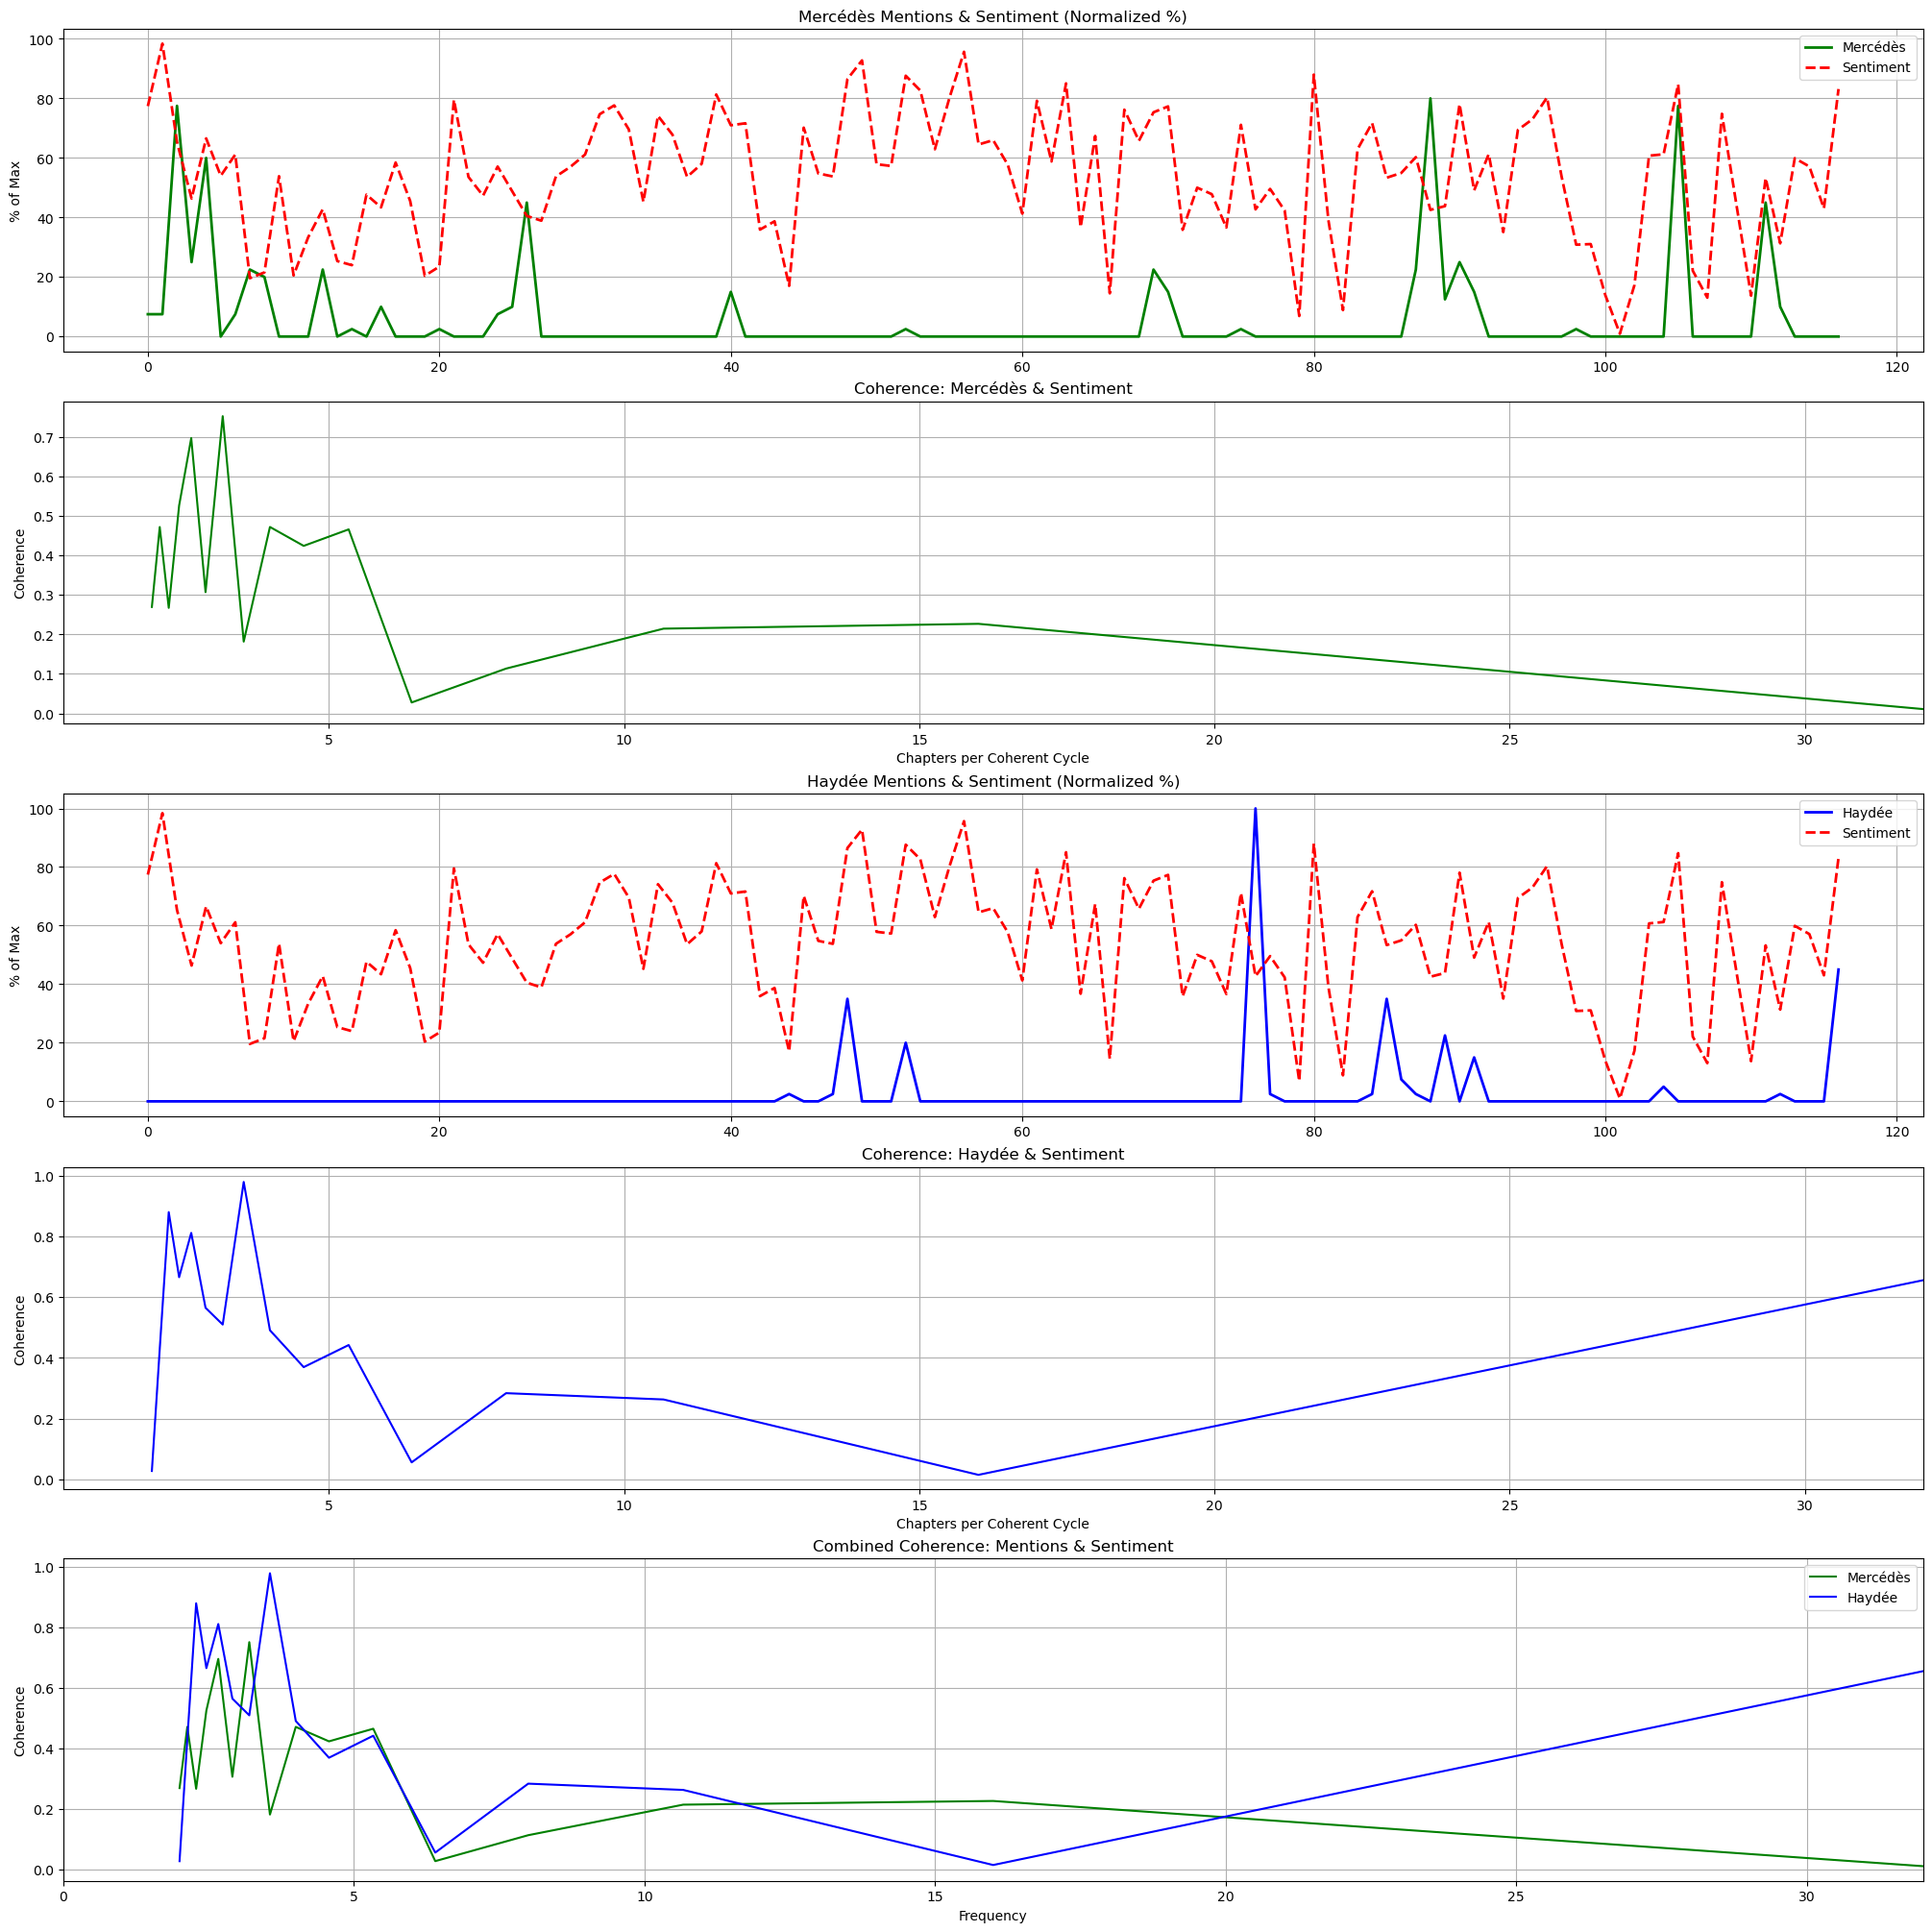

In [36]:
def to_percent(values, max_val):
    return [v / max_val * 100 for v in values]

max_freq = 40  # This is the maximum amount of times either Haydée or Mercédès are mentioned so this is the base for the max value.
H_values_percent = to_percent(H_values, max_freq)
M_values_percent = to_percent(M_values, max_freq)

# This will normalize the sentiment scores (decimals) into percentages like the other values.
min_sentiment = -0.02
max_sentiment = 0.17
sentiment_range = max_sentiment - min_sentiment
normalized_sentiment = [(s - min_sentiment) / sentiment_range * 100 for s in all_sentiments]

# X-axis values
x = np.arange(len(normalized_sentiment))

fig, axs = plt.subplots(5, 1, figsize=(20, 20), constrained_layout=True)


# --- Plot 1: Mercédès line + sentiment ---
axs[0].plot(x, M_values_percent, label='Mercédès', color='green', linewidth=2)
axs[0].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[0].set_title('Mercédès Mentions & Sentiment (Normalized %)')
axs[0].set_ylabel('% of Max')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Coherence (Mercédès vs. Sentiment) ---
cxy_M, f_M = axs[1].cohere(M_values_percent, normalized_sentiment, NFFT=32, Fs=1)

# For Mercédès
f_M_nonzero = f_M[f_M > 0]
cxy_M_nonzero = cxy_M[f_M > 0]
chapters_per_cycle_M = 1 / f_M_nonzero

axs[1].set_ylabel('Coherence')
axs[1].set_title('Coherence: Mercédès & Sentiment')
axs[1].grid(True)

axs[1].cla()  # Clear the previous cohere() plot

axs[1].plot(chapters_per_cycle_M, cxy_M_nonzero, color='green')
axs[1].set_ylabel('Coherence')
axs[1].set_title('Coherence: Mercédès & Sentiment')
axs[1].set_xlabel('Chapters per Coherent Cycle')
axs[1].grid(True)

# --- Plot 3: Haydée line + sentiment ---
axs[2].plot(x, H_values_percent, label='Haydée', color='blue', linewidth=2)
axs[2].plot(x, normalized_sentiment, label='Sentiment', color='red', linestyle='--', linewidth=2)
axs[2].set_title('Haydée Mentions & Sentiment (Normalized %)')
axs[2].set_ylabel('% of Max')
axs[2].legend()
axs[2].grid(True)

# --- Plot 4: Coherence (Haydée vs. Sentiment) ---
cxy_H, f_H = axs[3].cohere(H_values_percent, normalized_sentiment, NFFT=32, Fs=1)

# For Haydée
f_H_nonzero = f_H[f_H > 0]
cxy_H_nonzero = cxy_H[f_H > 0]
chapters_per_cycle_H = 1 / f_H_nonzero

axs[3].set_ylabel('Coherence')
axs[3].set_title('Coherence: Haydée & Sentiment')
axs[3].grid(True)

axs[3].cla()

axs[3].plot(chapters_per_cycle_H, cxy_H_nonzero, color='blue')
axs[3].set_ylabel('Coherence')
axs[3].set_title('Coherence: Haydée & Sentiment')
axs[3].set_xlabel('Chapters per Coherent Cycle')
axs[3].grid(True)

max_cycle = max(chapters_per_cycle_M.max(), chapters_per_cycle_H.max())

axs[1].set_xlim(right=max_cycle)
axs[3].set_xlim(right=max_cycle)
axs[4].set_xlim(right=max_cycle)


# --- Plot 5: Combined Coherence Plot ---
axs[4].plot(chapters_per_cycle_M, cxy_M_nonzero, label='Mercédès', color='green')
axs[4].plot(chapters_per_cycle_H, cxy_H_nonzero, label='Haydée', color='blue')
axs[4].set_title('Combined Coherence: Mentions & Sentiment')
axs[4].set_xlabel('Frequency')
axs[4].set_ylabel('Coherence')
axs[4].legend()
axs[4].grid(True)

plt.show()

Now, from these graphs we can concur that there are moments, especially within the beginning of the novel, where Mercédès and the sentiment scores have a lot of movement. This is because at the beginning of the novel, Mercédès is the main love interest of Dantès and his story of betrayal and revenge is tightly related to her. As the novel goes on, the sentiment scores and her mentions have a significant drop because by the end, she is a part of his story but she does not take the same level of involvement as she did in the beginning. I would even venture to say that she is no longer the center of Dantès' life.

However, when Haydée's mentions become more prominent in the later half of the novel, there is a constant increase in coherence. Both her mentions and sentiment scores are meeting the same high frequency. Therefore, we can see how she holds a direct connection to a sentiment score increase in Dantès story.

Given the data, I would continue to state that Haydée's love is one of the fundamental reasons in Dantès' redemption as he learns to let go of the past and look towards a future.

From the previous semester, when we studied this novel, I think this was done beautifully in the show that we watched alongside reading the novel because, in the film, it is Haydée who urges Dantès to move on and allow himself to forgive those who betrayed him, to allow himself to be happy.

This kind of technology can help us to go through large amounts of text to find patterns and themes without having to read every single word. It can save time and it can allow us to interact with a text in a more intricate way.